In [215]:
from src import utils
from copy import deepcopy
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import joblib

In [216]:
X_train = utils.deserialize_data('data/interim/X_train.pkl')
y_train = utils.deserialize_data('data/interim/y_train.pkl')
X_test = utils.deserialize_data('data/interim/X_test.pkl')
y_test = utils.deserialize_data('data/interim/y_test.pkl')
X_valid = utils.deserialize_data('data/interim/X_valid.pkl')
y_valid = utils.deserialize_data('data/interim/y_valid.pkl')

Data deserialized from data/interim/X_train.pkl
Data deserialized from data/interim/y_train.pkl
Data deserialized from data/interim/X_test.pkl
Data deserialized from data/interim/y_test.pkl
Data deserialized from data/interim/X_valid.pkl
Data deserialized from data/interim/y_valid.pkl


In [217]:
def drop_duplicate_data(X, y):
    if not isinstance(X, pd.DataFrame):
        print("Data X harus bertipe DataFrame")
    elif not isinstance(y, pd.Series):
        print("Data y harus bertipe Series")
    else:
        print("Fungsi drop_duplicate_data: parameter telah divalidasi")
    
    # Salin data
    X = X.copy()
    y = y.copy()
    
    # Print shape sebelum dropping duplicate
    print(f"Fungsi drop_duplicate_data: shape dataset sebelum dropping duplicate adalah {X.shape}.")
    
    # Pengecekan duplicate
    X_duplicate = X[X.duplicated()]
    print(f"Fungsi drop_duplicate_data: shape dari data yang duplicate adalah {X_duplicate.shape}.")
    
    # Kalkulasi shape setelah drop duplicate
    X_clean = (X.shape[0] - X_duplicate.shape[0], X.shape[1])
    print(f"Fungsi drop_duplicate_data: shape dataset setelah drop duplicate seharusnya adalah {X_clean}.")
    
    # Drop duplicates
    X.drop_duplicates(inplace=True)
    y = y.loc[X.index]
    
    # Print shape setelah dropping duplicate
    print(f"Fungsi drop_duplicate_data: shape dataset setelah dropping duplicate adalah {X.shape}.")
    
    return X, y


In [218]:
X_train, y_train = drop_duplicate_data(X_train, y_train)
len(y_train)

Data y harus bertipe Series
Fungsi drop_duplicate_data: shape dataset sebelum dropping duplicate adalah (116368, 21).
Fungsi drop_duplicate_data: shape dari data yang duplicate adalah (176, 21).
Fungsi drop_duplicate_data: shape dataset setelah drop duplicate seharusnya adalah (116192, 21).
Fungsi drop_duplicate_data: shape dataset setelah dropping duplicate adalah (116192, 21).


116192

In [219]:
categorical_col, contin_val=[],[]

for i in X_train.columns:
    
    if X_train[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [220]:
def median_imputation(data: pd.DataFrame, subset_data, columns, fit: bool):
    """
    Fungsi untuk melakukan imputasi nilai median pada data yang hilang.
    
    Parameters:
    data : pd.DataFrame
        Data yang akan diimputasi (train, test, atau valid).
    subset_data : list atau dict
        Untuk fit = True, subset_data harus bertipe list yang berisi daftar nama kolom yang ingin diimputasi.
        Untuk fit = False, subset_data harus bertipe dict dengan nama kolom sebagai key dan nilai median sebagai value.
    fit : bool
        Menandakan apakah akan menghitung nilai median baru atau menggunakan yang sudah ada.
    """
    
    # Validasi parameter
    if not isinstance(data, pd.DataFrame):
        raise RuntimeError("Fungsi median_imputation: parameter data haruslah bertipe DataFrame!")

    if fit == True:
        if not isinstance(subset_data, list):
            raise RuntimeError("Fungsi median_imputation: untuk nilai parameter fit = True, subset_data harus bertipe list dan berisi daftar nama kolom yang ingin dicari nilai mediannya guna menjadi data imputasi pada kolom tersebut.")
        print("Fungsi median_imputation: parameter telah divalidasi.")
    elif fit == False:
        if not isinstance(subset_data, dict):
            raise RuntimeError("Fungsi median_imputation: untuk nilai parameter fit = False, subset_data harus bertipe dict dan berisi key yang merupakan nama kolom beserta value yang merupakan nilai median dari kolom tersebut.")
        print("Fungsi median_imputation: parameter telah divalidasi.")
    else:
        raise RuntimeError("Fungsi median_imputation: parameter fit haruslah bertipe boolean, bernilai True atau False.")
    
    # Salin data dan subset_data
    data = data.copy()
    subset_data = deepcopy(subset_data)
    
    # Proses imputasi
    if fit:
        imputation_data = {}
        for subset in subset_data:
            mean_value = data[subset].mean()
            imputation_data[subset] = mean_value
        print(f"Fungsi mean_imputation: proses fitting telah selesai, berikut hasilnya {imputation_data}.")
        return imputation_data
    else:
        print("Fungsi median_imputation: informasi count na sebelum dilakukan imputasi:")
        print(data.isna().sum())
        print("")
        
        for col in columns:
            data[col] = data[col].fillna(subset_data[col])
        
        print("Fungsi median_imputation: informasi count na setelah dilakukan imputasi:")
        print(data.isna().sum())
        print("")
        
        return data


In [221]:
def mean_imputation(data: pd.DataFrame, subset_data, columns, fit: bool):
    """
    Fungsi untuk melakukan imputasi nilai mean pada data yang hilang.
    
    Parameters:
    data : pd.DataFrame
        Data yang akan diimputasi (train, test, atau valid).
    subset_data : list atau dict
        Untuk fit = True, subset_data harus bertipe list yang berisi daftar nama kolom yang ingin diimputasi.
        Untuk fit = False, subset_data harus bertipe dict dengan nama kolom sebagai key dan nilai mean sebagai value.
    fit : bool
        Menandakan apakah akan menghitung nilai mean baru atau menggunakan yang sudah ada.
    """
    
    # Validasi parameter
    if not isinstance(data, pd.DataFrame):
        raise RuntimeError("Fungsi mean_imputation: parameter data haruslah bertipe DataFrame!")

    if fit == True:
        if not isinstance(subset_data, list):
            raise RuntimeError("Fungsi mean_imputation: untuk nilai parameter fit = True, subset_data harus bertipe list dan berisi daftar nama kolom yang ingin dicari nilai mediannya guna menjadi data imputasi pada kolom tersebut.")
        print("Fungsi mean_imputation: parameter telah divalidasi.")
    elif fit == False:
        if not isinstance(subset_data, dict):
            raise RuntimeError("Fungsi mean_imputation: untuk nilai parameter fit = False, subset_data harus bertipe dict dan berisi key yang merupakan nama kolom beserta value yang merupakan nilai median dari kolom tersebut.")
        print("Fungsi mean_imputation: parameter telah divalidasi.")
    else:
        raise RuntimeError("Fungsi mean_imputation: parameter fit haruslah bertipe boolean, bernilai True atau False.")
    
    # Salin data dan subset_data
    data = data.copy()
    subset_data = deepcopy(subset_data)
    
    # Proses imputasi
    if fit:
        imputation_data = {}
        for subset in subset_data:
            mean_value = data[subset].mean()
            imputation_data[subset] = mean_value
        print(f"Fungsi mean_imputation: proses fitting telah selesai, berikut hasilnya {imputation_data}.")
        return imputation_data
    else:
        print("Fungsi mean_imputation: informasi count na sebelum dilakukan imputasi:")
        print(data.isna().sum())
        print("")

        for col in columns:
            data[col] = data[col].fillna(subset_data[col])
        print("Fungsi mean_imputation: informasi count na setelah dilakukan imputasi:")
        print(data.isna().sum())
        print("")
        return data

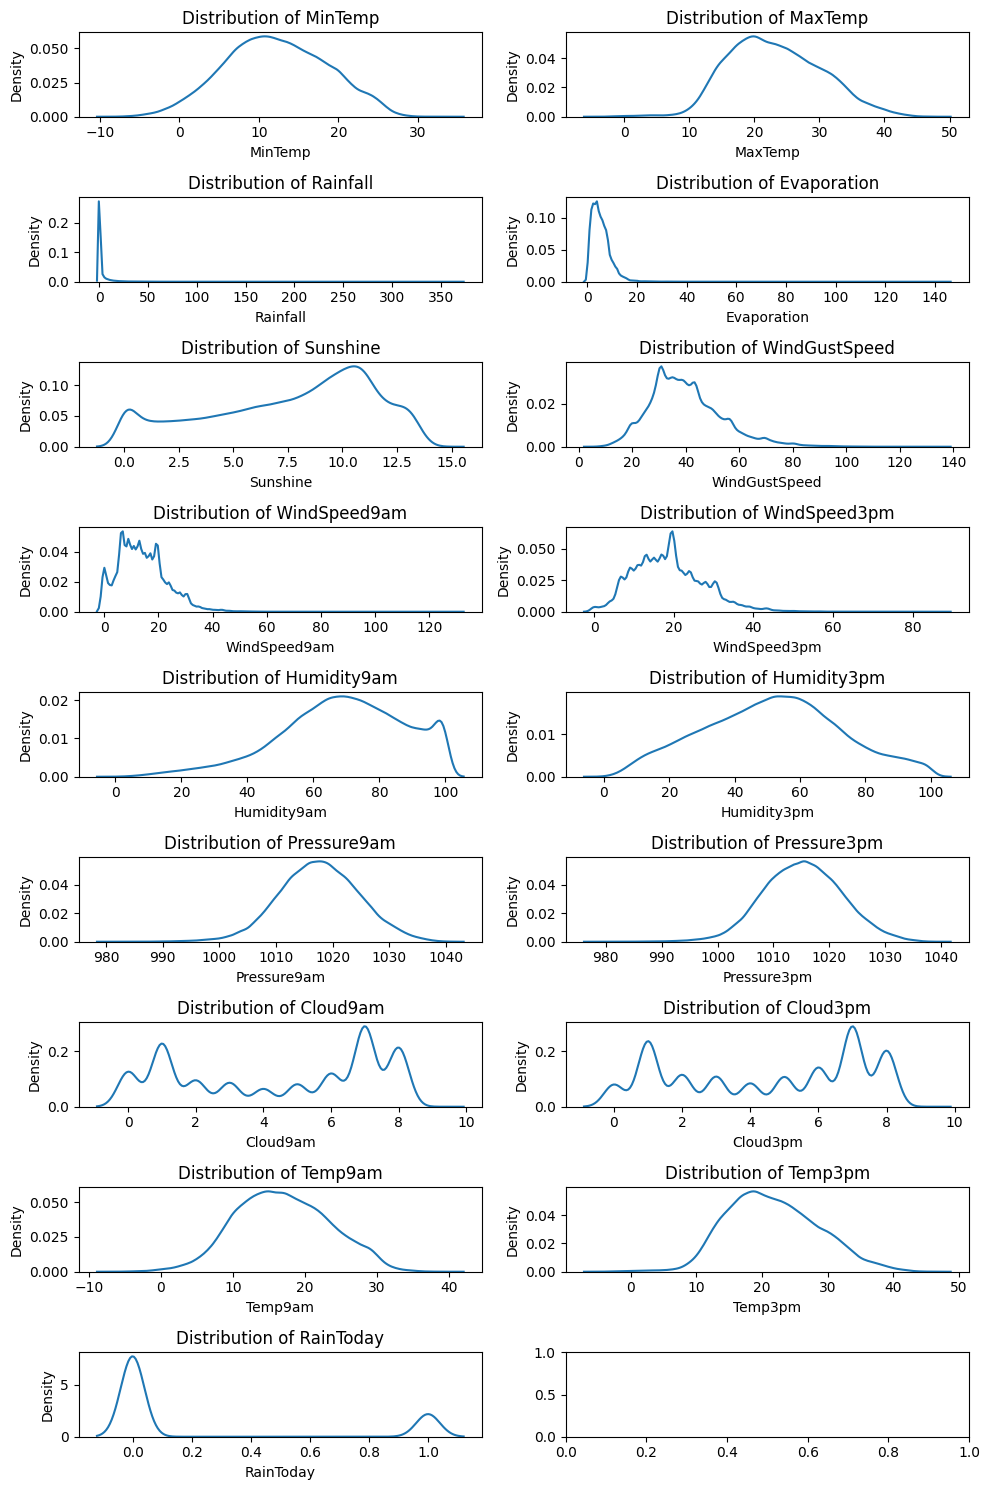

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot histogram
X_train_num = X_train.drop(columns=categorical_col)
rows = len(list(X_train_num.columns)) // 2+1
fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(10, 15))
axes = ax.flatten()
for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [223]:
# Anggap subset_data berisi nama kolom yang hendak diimputasi
subset_data = X_train.select_dtypes(include=np.number).columns.tolist()  # Ganti dengan nama kolom yang relevan
print(subset_data);
mean_col = ['Temp3pm', 'Temp9am', 'MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm']
# Panggil fungsi untuk fitting
subset_data = mean_imputation(X_train, subset_data, mean_col, True)

# Panggil fungsi untuk imputasi pada X_train
X_train = mean_imputation(X_train, subset_data, mean_col, False)

# Panggil fungsi untuk imputasi pada X_test
X_test = mean_imputation(X_test, subset_data, mean_col, False)

# Panggil fungsi untuk imputasi pada X_valid
X_valid = mean_imputation(X_valid, subset_data, mean_col, False)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
Fungsi mean_imputation: parameter telah divalidasi.
Fungsi mean_imputation: proses fitting telah selesai, berikut hasilnya {'MinTemp': np.float64(12.202402264223018), 'MaxTemp': np.float64(23.22755607188993), 'Rainfall': np.float64(2.357875390229961), 'Evaporation': np.float64(5.470569907435417), 'Sunshine': np.float64(7.601377533323422), 'WindGustSpeed': np.float64(40.0474428928142), 'WindSpeed9am': np.float64(14.048590814196242), 'WindSpeed3pm': np.float64(18.677071629213483), 'Humidity9am': np.float64(68.84167491048527), 'Humidity3pm': np.float64(51.54335911171024), 'Pressure9am': np.float64(1017.6404642288738), 'Pressure3pm': np.float64(1015.2494520043714), 'Cloud9am': np.float64(4.445284071104915), 'Cloud3pm': np.float64(4.513914872017983), 'Temp9am': np.

In [224]:
subset_data = X_train.select_dtypes(include=np.number).columns.tolist()  # Ganti dengan nama kolom yang relevan
median_col = ['Cloud9am', 'Cloud3pm', 'Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Sunshine', 'Evaporation', 'Rainfall', 'WindGustSpeed']
# Panggil fungsi untuk fitting
subset_data = median_imputation(X_train, subset_data, median_col, True)

# Panggil fungsi untuk imputasi pada X_train
X_train = median_imputation(X_train, subset_data, median_col, False)

# Panggil fungsi untuk imputasi pada X_test
X_test = median_imputation(X_test, subset_data, median_col, False)

# Panggil fungsi untuk imputasi pada X_valid
X_valid = median_imputation(X_valid, subset_data, median_col, False)

Fungsi median_imputation: parameter telah divalidasi.
Fungsi mean_imputation: proses fitting telah selesai, berikut hasilnya {'MinTemp': np.float64(12.202402264223016), 'MaxTemp': np.float64(23.227556071889932), 'Rainfall': np.float64(2.357875390229961), 'Evaporation': np.float64(5.470569907435417), 'Sunshine': np.float64(7.601377533323422), 'WindGustSpeed': np.float64(40.0474428928142), 'WindSpeed9am': np.float64(14.048590814196242), 'WindSpeed3pm': np.float64(18.677071629213483), 'Humidity9am': np.float64(68.84167491048527), 'Humidity3pm': np.float64(51.54335911171024), 'Pressure9am': np.float64(1017.6404642288741), 'Pressure3pm': np.float64(1015.249452004371), 'Cloud9am': np.float64(4.445284071104915), 'Cloud3pm': np.float64(4.513914872017983), 'Temp9am': np.float64(17.002730120062644), 'Temp3pm': np.float64(21.68646076573996), 'RainToday': np.float64(0.2194040897824291)}.
Fungsi median_imputation: parameter telah divalidasi.
Fungsi median_imputation: informasi count na sebelum dila

RainToday
0.0    90699
1.0    25493
Name: count, dtype: int64
RainTomorrow
0.0    90695
1.0    25497
Name: count, dtype: int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

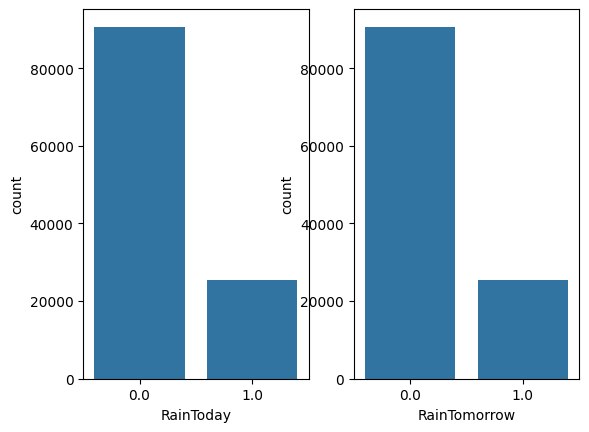

<Figure size 2000x2000 with 0 Axes>

In [225]:
fig, ax =plt.subplots(1,2)
print(X_train.RainToday.value_counts())
print(y_train.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=X_train,x='RainToday',ax=ax[0])
sns.countplot(data=y_train,x='RainTomorrow',ax=ax[1])

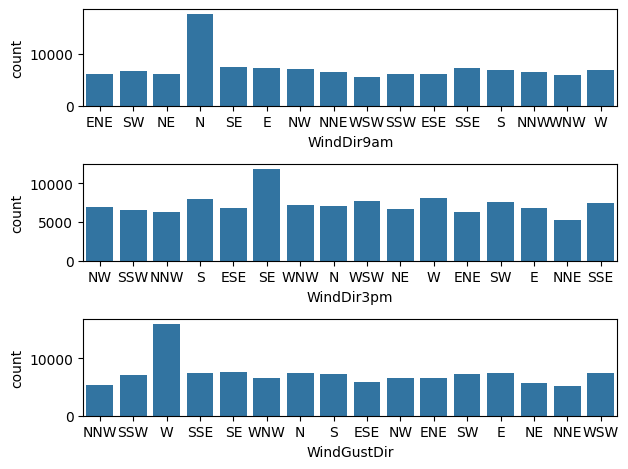

<Figure size 1000x1000 with 0 Axes>

In [226]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=X_train,x='WindDir9am',ax=ax[0])
sns.countplot(data=X_train,x='WindDir3pm',ax=ax[1])
sns.countplot(data=X_train,x='WindGustDir',ax=ax[2])
fig.tight_layout()

In [227]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
134930,Launceston,1.4,16.5,0.0,5.47057,7.601378,NNW,13.000000,ENE,NW,...,7.0,92.0,64.0,1017.640464,1015.249452,4.445284,4.513915,5.5,16.1,0.0
12967,Moree,5.9,18.8,0.0,3.20000,6.200000,SSW,46.000000,SW,SSW,...,22.0,91.0,43.0,1016.900000,1013.900000,8.000000,3.000000,6.9,18.6,0.0
16760,Newcastle,8.6,29.9,0.0,5.47057,7.601378,W,40.047443,NE,NW,...,9.0,77.0,20.0,1017.640464,1015.249452,0.000000,0.000000,15.6,28.8,0.0
109172,Albany,6.6,20.8,0.0,1.00000,9.300000,W,40.047443,N,NNW,...,19.0,62.0,31.0,1019.300000,1015.000000,1.000000,1.000000,10.0,20.4,0.0
114657,PearceRAAF,9.2,28.8,0.0,5.47057,12.700000,SSE,41.000000,SE,S,...,22.0,53.0,27.0,1013.900000,1011.800000,4.445284,4.513915,18.5,28.0,0.0


In [228]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
def create_label_encoder(data: pd.DataFrame, col: str, path:str):
    """
    Fungsi untuk membuat label encoder.
    
    Parameters:
    data : pd.DataFrame
        Data yang akan diimputasi (train, test, atau valid).
    columns : list
        Daftar nama kolom yang akan diimputasi.
    """
    
    # Validasi parameter
    if not isinstance(data, pd.DataFrame):
        raise RuntimeError("Fungsi create_label_encoder: parameter data haruslah bertipe DataFrame!")

    if not isinstance(col, str):
        raise RuntimeError("Fungsi create_label_encoder: parameter columns haruslah bertipe string dan berisi daftar nama kolom yang ingin diimputasi.")
    
    print("Fungsi create_label_encoder: parameter telah divalidasi.")
    
    # Salin data
    subset_data = data.copy()
    
    # Proses label encoding
    le = LabelEncoder()
    le.fit(subset_data[col])
    joblib.dump(le, path)
    
    print(f"Kategori yang telah dipelajari adalah {le}")

    print(f"Fungsi create_label_encoder: proses fitting telah selesai, berikut hasilnya {le}.")
    return le

In [229]:
def label_encoder_transform(data: pd.DataFrame, col: str, le: LabelEncoder):
    """
    Fungsi untuk melakukan label encoding pada data.
    
    Parameters:
    data : pd.DataFrame
        Data yang akan diimputasi (train, test, atau valid).
    columns : list
        Daftar nama kolom yang akan diimputasi.
    le : object
        Label encoder yang sudah di-fit sebelumnya.
    """
    
    # Validasi parameter
    if not isinstance(data, pd.DataFrame):
        raise RuntimeError("Fungsi label_encoder_transform: parameter data haruslah bertipe DataFrame!")

    if not isinstance(col, str):
        raise RuntimeError("Fungsi label_encoder_transform: parameter columns haruslah bertipe string dan berisi daftar nama kolom yang ingin diimputasi.")
    
    print("Fungsi label_encoder_transform: parameter telah divalidasi.")
    
    # Salin data
    subset_data = data.copy()
    
    # Proses label encoding
    subset_data[col] = le.transform(subset_data[col])
    
    print(f"Fungsi label_encoder_transform: proses transformasi telah selesai.")
    return subset_data

In [230]:
encoder_path = 'models/'
le_location = create_label_encoder(X_train, 'Location', encoder_path+'le_location.pkl')
le_winddir9am = create_label_encoder(X_train, 'WindDir9am', encoder_path+'le_winddir9am.pkl')
le_winddir3pm = create_label_encoder(X_train, 'WindDir3pm', encoder_path+'le_winddir3pm.pkl')
le_windgustdir = create_label_encoder(X_train, 'WindGustDir', encoder_path+'le_windgustdir.pkl')

Fungsi create_label_encoder: parameter telah divalidasi.
Kategori yang telah dipelajari adalah LabelEncoder()
Fungsi create_label_encoder: proses fitting telah selesai, berikut hasilnya LabelEncoder().
Fungsi create_label_encoder: parameter telah divalidasi.
Kategori yang telah dipelajari adalah LabelEncoder()
Fungsi create_label_encoder: proses fitting telah selesai, berikut hasilnya LabelEncoder().
Fungsi create_label_encoder: parameter telah divalidasi.
Kategori yang telah dipelajari adalah LabelEncoder()
Fungsi create_label_encoder: proses fitting telah selesai, berikut hasilnya LabelEncoder().
Fungsi create_label_encoder: parameter telah divalidasi.
Kategori yang telah dipelajari adalah LabelEncoder()
Fungsi create_label_encoder: proses fitting telah selesai, berikut hasilnya LabelEncoder().


In [231]:
X_train = label_encoder_transform(X_train, 'Location', le_location)
X_train = label_encoder_transform(X_train, 'WindDir9am', le_winddir9am)
X_train = label_encoder_transform(X_train, 'WindDir3pm', le_winddir3pm)
X_train = label_encoder_transform(X_train, 'WindGustDir', le_windgustdir)

X_test = label_encoder_transform(X_test, 'Location', le_location)
X_test = label_encoder_transform(X_test, 'WindDir9am', le_winddir9am)
X_test = label_encoder_transform(X_test, 'WindDir3pm', le_winddir3pm)
X_test = label_encoder_transform(X_test, 'WindGustDir', le_windgustdir)

X_valid = label_encoder_transform(X_valid, 'Location', le_location)
X_valid = label_encoder_transform(X_valid, 'WindDir9am', le_winddir9am)
X_valid = label_encoder_transform(X_valid, 'WindDir3pm', le_winddir3pm)
X_valid = label_encoder_transform(X_valid, 'WindGustDir', le_windgustdir)

Fungsi label_encoder_transform: parameter telah divalidasi.
Fungsi label_encoder_transform: proses transformasi telah selesai.
Fungsi label_encoder_transform: parameter telah divalidasi.
Fungsi label_encoder_transform: proses transformasi telah selesai.
Fungsi label_encoder_transform: parameter telah divalidasi.
Fungsi label_encoder_transform: proses transformasi telah selesai.
Fungsi label_encoder_transform: parameter telah divalidasi.
Fungsi label_encoder_transform: proses transformasi telah selesai.
Fungsi label_encoder_transform: parameter telah divalidasi.
Fungsi label_encoder_transform: proses transformasi telah selesai.
Fungsi label_encoder_transform: parameter telah divalidasi.
Fungsi label_encoder_transform: proses transformasi telah selesai.
Fungsi label_encoder_transform: parameter telah divalidasi.
Fungsi label_encoder_transform: proses transformasi telah selesai.
Fungsi label_encoder_transform: parameter telah divalidasi.
Fungsi label_encoder_transform: proses transformasi

In [232]:
from scipy import stats
print('Shape of DataFrame Before Removing Outliers', X_train.shape )
X_train=X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', X_train.shape )
print('Shape of DataFrame Before Removing Outliers', y_train.shape )
y_train=y_train.loc[X_train.index]
print('Shape of DataFrame After Removing Outliers', y_train.shape )

Shape of DataFrame Before Removing Outliers (116192, 21)
Shape of DataFrame After Removing Outliers (109190, 21)
Shape of DataFrame Before Removing Outliers (116192, 1)
Shape of DataFrame After Removing Outliers (109190, 1)


In [233]:
# Serialize X_train
utils.serialize_data(X_train, 'data/processed/X_train_prep.pkl')

# Serialize X_test
utils.serialize_data(X_test, 'data/processed/X_test_prep.pkl')

# Serialize X_valid
utils.serialize_data(X_valid, 'data/processed/X_valid_prep.pkl')


Data serialized to data/processed/X_train_prep.pkl
Data serialized to data/processed/X_test_prep.pkl
Data serialized to data/processed/X_valid_prep.pkl


In [234]:
# Serialize y_train
utils.serialize_data(y_train, 'data/processed/y_train_prep.pkl')
# Serialize y_test
utils.serialize_data(y_test, 'data/processed/y_test_prep.pkl')

# Serialize y_valid
utils.serialize_data(y_valid, 'data/processed/y_valid_prep.pkl')


Data serialized to data/processed/y_train_prep.pkl
Data serialized to data/processed/y_test_prep.pkl
Data serialized to data/processed/y_valid_prep.pkl


In [235]:
y_valid.info

<bound method DataFrame.info of         RainTomorrow
10169            0.0
58947            0.0
27336            1.0
119822           0.0
51064            0.0
...              ...
116024           0.0
967              0.0
133753           1.0
51896            0.0
11152            0.0

[14546 rows x 1 columns]>

In [236]:
X_valid.info

<bound method DataFrame.info of         Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
10169         11     17.2     25.8  0.000000      6.00000  11.400000   
58947          6     13.3     27.3  0.000000      5.40000   7.601378   
27336         34      4.9     17.5  2.200000      1.10000   7.601378   
119822        32     14.6     28.1  0.000000      7.60000  10.700000   
51064         40     -0.2     21.3  0.000000      5.47057   7.601378   
...          ...      ...      ...       ...          ...        ...   
116024        29     12.6     39.8  0.000000      5.47057  13.200000   
967            2      2.5     20.7  0.000000      5.47057   7.601378   
133753        17     10.9     27.4  0.000000      5.47057   7.601378   
51896         40     17.4     34.9  0.000000      5.47057   7.601378   
11152         11     19.3     28.2  2.357875      5.47057   7.601378   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
10169            10   